### ***Chargement de données***

In [1]:
import pandas as pd
app_test = pd.read_csv('app_test_domain.csv')
app_train = pd.read_csv('app_train_domain.csv')

In [2]:
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,False,True,False,True,False,False,4.213333,0.152300,0.036147,0.121044
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,False,False,False,False,False,False,2.250182,0.175455,0.077973,0.247398
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,False,False,False,False,False,False,3.275378,0.344578,0.105202,0.222477
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,True,False,False,True,False,False,5.000000,0.155614,0.031123,0.133515
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,False,False,False,False,False,False,3.475000,0.178150,0.051266,0.168021


In [3]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,True,False,True,False,1,False,2.007889,0.121978,0.060749,-0.067329
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,False,False,True,False,0,False,4.790750,0.132217,0.027598,-0.070862
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,False,False,False,False,0,False,2.000000,0.100000,0.050000,-0.011814
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,False,False,False,False,0,False,2.316167,0.219900,0.094941,-0.159905
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,False,False,False,False,0,False,4.222222,0.179963,0.042623,-0.152418


Nombre de 0: 282686
Nombre de 1: 24825


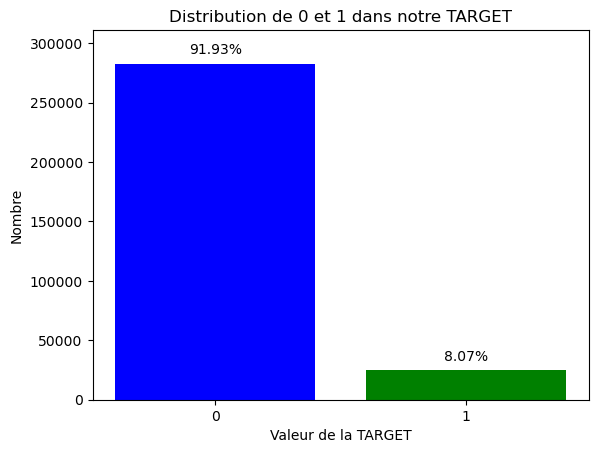

In [4]:
import matplotlib.pyplot as plt

# Supposons que votre dataframe est déjà défini comme df

# Supprimer les NaN
DB = app_train['TARGET'].dropna()

# Compter le nombre de 0 et 1
count_0 = (DB == 0).sum()
count_1 = (DB == 1).sum()

# Créer les variables pour le nombre de 0 et 1
nb_0 = count_0
nb_1 = count_1

print(f"Nombre de 0: {nb_0}")
print(f"Nombre de 1: {nb_1}")

# Calculer les pourcentages
total = len(DB)
percentage_0 = (nb_0 / total) * 100
percentage_1 = (nb_1 / total) * 100

# Créer le graphique en barres
labels = ['0', '1']
values = [nb_0, nb_1]
bars = plt.bar(labels, values, color=['blue', 'green'])

# Augmenter l'espace en haut pour les annotations
plt.ylim(0, max(values) * 1.1)  # 10% d'espace supplémentaire en haut

# Annoter le graphique avec les pourcentages
for bar, pct in zip(bars, [percentage_0, percentage_1]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + 0.02 * max(values),
             f'{pct:.2f}%',
             ha='center',
             va='bottom')

plt.xlabel('Valeur de la TARGET')
plt.ylabel('Nombre')
plt.title('Distribution de 0 et 1 dans notre TARGET')
plt.show()

On a énormément de 0 (plus de 91% du total), il va falloir en prendre en compte dans nos modèles.
On va fusioner les dataframes train et test

In [5]:
# Supposons que app_train et app_test sont les DataFrames
df = pd.concat([app_train, app_test]).reset_index(drop=True)

***Imputation des valeurs manquantes de la variable TARGET***

In [6]:
df_classification = df[df['TARGET'].notnull()]

In [7]:
#Création df_classification_imputed (stratégie: Moyenne)
df_classification_imputed = df_classification.copy()
df_classification_imputed.fillna(df_classification.mean(), inplace=True) 

#### Préparation des données (X, y, Scaling, Split)

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Chargement et séparation des données
X = df_classification_imputed.drop(columns=["TARGET", "SK_ID_CURR"])
y = df_classification_imputed["TARGET"]

# 2. Séparation en ensemble d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

# 3. Normalisation (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Vérification des dimensions
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")


X_train shape: (246008, 243), y_train shape: (246008,)
X_val shape: (61503, 243), y_val shape: (61503,)


### ***DummyClassifer***

In [9]:
import mlflow
import mlflow.sklearn
import time
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_curve
)

# 1. Préparation de la Cross-Validation
cv = StratifiedKFold(n_splits=5)
strategies = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']

# 2. Fonction d'évaluation
def eval_score(model, X, y, cv):
    """Calcule les métriques et trace les courbes ROC et la matrice de confusion."""
    
    # Temps de prédiction
    start_time = time.time()
    y_prob = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    elapsed_time = time.time() - start_time
    
    y_pred = (y_prob > 0.5).astype(int)

    # Calcul des métriques
    auc = roc_auc_score(y, y_prob)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn  # Score métier

    # Matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matrice de Confusion")
    plt.savefig("conf_mat.png")
    plt.close()

    # Courbe ROC
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend()
    plt.savefig("roc_curve.png")
    plt.close()
    
    return auc, acc, precision, recall, cost, elapsed_time

# 3. Expérimentation avec MLflow
mlflow.set_experiment("DummyClassifier")

if mlflow.active_run():
    mlflow.end_run()

for strategy in strategies:
    with mlflow.start_run(run_name=f"DummyClassifier - {strategy}"):
        dummy = DummyClassifier(strategy=strategy, constant=1 if strategy == 'constant' else None)

        # Entraînement du modèle
        start_time_fit = time.time()
        dummy.fit(X_train_scaled, y_train)
        elapsed_time_fit = time.time() - start_time_fit

        # Évaluation du modèle
        auc, acc, precision, recall, cost, elapsed_time_predict = eval_score(dummy, X_val_scaled, y_val, cv)

        # Enregistrement des métriques
        mlflow.log_param("Strategy", strategy)
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("Business Score", cost)
        mlflow.log_metric("Fit Time", elapsed_time_fit)
        mlflow.log_metric("Prediction Time", elapsed_time_predict)

        # Enregistrement du modèle et des artefacts
        mlflow.sklearn.log_model(dummy, "dummy_model")
        mlflow.log_artifact("roc_curve.png")
        mlflow.log_artifact("conf_mat.png")
    
    mlflow.end_run()

# Libération de la mémoire
gc.collect()


2025/02/27 14:22:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/27 14:22:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/27 14:22:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/27 14:22:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/27 14:22:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


993

### ***Régression logistique***

In [10]:
import mlflow
import mlflow.sklearn
import time
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve
)

# 1. Fonction d'évaluation
def eval_score(model, X, y, seuil=0.5):
    """Calcule les métriques et trace les courbes ROC et la matrice de confusion."""
    
    # Prédiction des probabilités
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_pred_proba > seuil).astype(int)

    # Calcul des métriques
    auc = roc_auc_score(y, y_pred_proba)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn  # Score métier

    # Matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matrice de Confusion")
    plt.savefig("conf_mat.png")
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend()
    plt.savefig("roc_curve.png")
    plt.close()
    
    return auc, acc, precision, recall, f1, cost

# 2. Expérimentation avec MLflow
mlflow.set_experiment("LogisticRegression")

if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="LogisticRegression - Sans équilibrage"):
    model = LogisticRegression(max_iter=1000, random_state=0)

    # Entraînement du modèle
    start_time_fit = time.time()
    model.fit(X_train_scaled, y_train)
    elapsed_time_fit = time.time() - start_time_fit

    # Évaluation du modèle
    auc, acc, precision, recall, f1, cost = eval_score(model, X_val_scaled, y_val)

    # Enregistrement des métriques
    mlflow.log_metric("AUC", auc)
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("Business Score", cost)
    mlflow.log_metric("Fit Time", elapsed_time_fit)

    # Enregistrement du modèle et des artefacts
    mlflow.sklearn.log_model(model, "logistic_regression")
    mlflow.log_artifact("roc_curve.png")
    mlflow.log_artifact("conf_mat.png")

mlflow.end_run()

# Libération de la mémoire
gc.collect()


2025/02/27 14:23:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


37900

## Arbre de décision

In [11]:
import mlflow
import mlflow.sklearn
import time
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve
)

# 1. Fonction d'évaluation
def eval_score(model, X, y, seuil=0.5):
    """Calcule les métriques et trace les courbes ROC et la matrice de confusion."""
    
    # Prédiction des probabilités
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_pred_proba > seuil).astype(int)

    # Calcul des métriques
    auc = roc_auc_score(y, y_pred_proba)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn  # Score métier

    # Matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matrice de Confusion")
    plt.savefig("conf_mat.png")
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend()
    plt.savefig("roc_curve.png")
    plt.close()
    
    return auc, acc, precision, recall, f1, cost

# 2. Expérimentation avec MLflow
mlflow.set_experiment("DecisionTreeClassifier")

if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="DecisionTree - Default"):
    model = DecisionTreeClassifier(random_state=0)

    # Entraînement du modèle
    start_time_fit = time.time()
    model.fit(X_train_scaled, y_train)
    elapsed_time_fit = time.time() - start_time_fit

    # Évaluation du modèle
    auc, acc, precision, recall, f1, cost = eval_score(model, X_val_scaled, y_val)

    # Enregistrement des métriques
    mlflow.log_metric("AUC", auc)
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("Business Score", cost)
    mlflow.log_metric("Fit Time", elapsed_time_fit)

    # Enregistrement du modèle et des artefacts
    mlflow.sklearn.log_model(model, "decision_tree")
    mlflow.log_artifact("roc_curve.png")
    mlflow.log_artifact("conf_mat.png")

mlflow.end_run()

# Libération de la mémoire
gc.collect()

2025/02/27 14:24:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


8199

## Random Forest

In [12]:
import mlflow
import mlflow.sklearn
import time
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve
)

# 1. Fonction d'évaluation
def eval_score(model, X, y, seuil=0.5):
    """Calcule les métriques et trace les courbes ROC et la matrice de confusion."""
    
    # Prédiction des probabilités
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_pred_proba > seuil).astype(int)

    # Calcul des métriques
    auc = roc_auc_score(y, y_pred_proba)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn  # Score métier

    # Matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matrice de Confusion")
    plt.savefig("conf_mat.png")
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend()
    plt.savefig("roc_curve.png")
    plt.close()
    
    return auc, acc, precision, recall, f1, cost

# 2. Expérimentation avec MLflow
mlflow.set_experiment("RandomForestClassifier")

if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="RandomForest - Default"):
    model = RandomForestClassifier(random_state=0)

    # Entraînement du modèle
    start_time_fit = time.time()
    model.fit(X_train_scaled, y_train)
    elapsed_time_fit = time.time() - start_time_fit

    # Évaluation du modèle
    auc, acc, precision, recall, f1, cost = eval_score(model, X_val_scaled, y_val)

    # Enregistrement des métriques
    mlflow.log_metric("AUC", auc)
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("Business Score", cost)
    mlflow.log_metric("Fit Time", elapsed_time_fit)

    # Enregistrement du modèle et des artefacts
    mlflow.sklearn.log_model(model, "random_forest")
    mlflow.log_artifact("roc_curve.png")
    mlflow.log_artifact("conf_mat.png")

mlflow.end_run()

# Libération de la mémoire
gc.collect()


2025/02/27 14:27:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


7706

## Méthode d'équilibrage des données

**Le SMOTE** (Synthetic Minority Over-sampling Technique) est une méthode de sur-échantillonnage utilisée pour équilibrer des ensembles de données déséquilibrés en augmentant artificiellement la taille de la classe minoritaire. Contrairement à d'autres techniques de sur-échantillonnage comme la duplication simple des exemples de la classe minoritaire, SMOTE génère de nouvelles instances synthétiques en interpolant entre des exemples existants de la classe minoritaire.



In [13]:
from imblearn.over_sampling import SMOTE  # SMOTE pour équilibrage
#Application de SMOTE pour équilibrer l'ensemble d'entraînement
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


#### ***Régression logistique***

In [14]:
import mlflow
import mlflow.sklearn
import time
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve
)

# 1. Fonction d'évaluation
def eval_score(model, X, y, seuil=0.5):
    """Calcule les métriques et trace les courbes ROC et la matrice de confusion."""
    
    # Prédiction des probabilités
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_pred_proba > seuil).astype(int)

    # Calcul des métriques
    auc = roc_auc_score(y, y_pred_proba)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn  # Score métier

    # Matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matrice de Confusion")
    plt.savefig("conf_mat.png")
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend()
    plt.savefig("roc_curve.png")
    plt.close()
    
    return auc, acc, precision, recall, f1, cost

# 2. Expérimentation avec MLflow
mlflow.set_experiment("LogisticRegression with SMOTE")

if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="LogisticRegression with SMOTE"):
    model = LogisticRegression(max_iter=1000, random_state=0)

    # Entraînement du modèle
    start_time_fit = time.time()
    model.fit(X_train_resampled, y_train_resampled)
    elapsed_time_fit = time.time() - start_time_fit

    # Évaluation du modèle
    auc, acc, precision, recall, f1, cost = eval_score(model, X_val_scaled, y_val)

    # Enregistrement des métriques
    mlflow.log_metric("AUC", auc)
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("Business Score", cost)
    mlflow.log_metric("Fit Time", elapsed_time_fit)

    # Enregistrement du modèle et des artefacts
    mlflow.sklearn.log_model(model, "logistic_regression_with_smote")
    mlflow.log_artifact("roc_curve.png")
    mlflow.log_artifact("conf_mat.png")

mlflow.end_run()

# Libération de la mémoire
gc.collect()


2025/02/27 14:27:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


8361

#### ***Dummy classifier***

In [15]:
import mlflow
import mlflow.sklearn
import time
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve
)

# 1. Fonction d'évaluation
def eval_score(model, X, y, seuil=0.5):
    """Calcule les métriques et trace les courbes ROC et la matrice de confusion."""
    
    # Prédiction des probabilités
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_pred_proba > seuil).astype(int)

    # Calcul des métriques
    auc = roc_auc_score(y, y_pred_proba)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn  # Score métier

    # Matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matrice de Confusion")
    plt.savefig("conf_mat.png")
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend()
    plt.savefig("roc_curve.png")
    plt.close()
    
    return auc, acc, precision, recall, f1, cost

# 2. Expérimentation avec MLflow
mlflow.set_experiment("DummyClassifier with SMOTE")

if mlflow.active_run():
    mlflow.end_run()

# Liste des stratégies possibles pour DummyClassifier
strategies = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']

results = []

for strategy in strategies:
    with mlflow.start_run(run_name=f"DummyClassifier-{strategy}"):
        dummy = DummyClassifier(strategy=strategy, constant=1 if strategy == 'constant' else None)

        # Entraînement du modèle
        start_time_fit = time.time()
        dummy.fit(X_train_resampled, y_train_resampled)
        elapsed_time_fit = time.time() - start_time_fit

        # Évaluation du modèle
        auc, acc, precision, recall, f1, cost = eval_score(dummy, X_val_scaled, y_val)

        # Enregistrement des métriques
        mlflow.log_param("Strategy", strategy)
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Precision", precision)
        mlflow.log_metric("Recall", recall)
        mlflow.log_metric("F1 Score", f1)
        mlflow.log_metric("Business Score", cost)
        mlflow.log_metric("Fit Time", elapsed_time_fit)

        # Enregistrement du modèle et des artefacts
        mlflow.sklearn.log_model(dummy, f"dummy_classifier_{strategy}")
        mlflow.log_artifact("roc_curve.png")
        mlflow.log_artifact("conf_mat.png")

        # Ajouter les résultats à la liste
        results.append({
            "Strategy": strategy,
            "AUC": auc,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Business Score": cost
        })

# Afficher les résultats
results_df = pd.DataFrame(results)

# Libération de la mémoire
gc.collect()


2025/02/27 14:27:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/27 14:28:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/27 14:28:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/27 14:28:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/02/27 14:28:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


8536

#### ***Arbre de décision***

In [16]:
#3. Normalisation (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 4. Application de SMOTE pour équilibrer l'ensemble d'entraînement
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [17]:
import mlflow
import mlflow.sklearn
import time
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve
)

# 1. Fonction d'évaluation
def eval_score(model, X, y, seuil=0.5):
    """Calcule les métriques et trace les courbes ROC et la matrice de confusion."""
    
    # Prédiction des probabilités
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_pred_proba > seuil).astype(int)

    # Calcul des métriques
    auc = roc_auc_score(y, y_pred_proba)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn  # Score métier

    # Matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matrice de Confusion")
    plt.savefig("conf_mat.png")
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend()
    plt.savefig("roc_curve.png")
    plt.close()
    
    return auc, acc, precision, recall, f1, cost

# 2. Expérimentation avec MLflow
mlflow.set_experiment("DecisionTreeClassifier with SMOTE")

if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="DecisionTree with SMOTE"):
    model = DecisionTreeClassifier(random_state=0)

    # Entraînement du modèle
    start_time_fit = time.time()
    model.fit(X_train_resampled, y_train_resampled)
    elapsed_time_fit = time.time() - start_time_fit

    # Évaluation du modèle
    auc, acc, precision, recall, f1, cost = eval_score(model, X_val_scaled, y_val)

    # Enregistrement des métriques
    mlflow.log_metric("AUC", auc)
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("Business Score", cost)
    mlflow.log_metric("Fit Time", elapsed_time_fit)

    # Enregistrement du modèle et des artefacts
    mlflow.sklearn.log_model(model, "decision_tree_with_smote")
    mlflow.log_artifact("roc_curve.png")
    mlflow.log_artifact("conf_mat.png")

mlflow.end_run()

# Libération de la mémoire
gc.collect()


2025/02/27 14:30:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


37739

##### ***Random Forest avec SMOTE***

In [18]:
import mlflow
import mlflow.sklearn
import time
import gc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve
)

# 1. Fonction d'évaluation
def eval_score(model, X, y, seuil=0.5):
    """Calcule les métriques et trace les courbes ROC et la matrice de confusion."""
    
    # Prédiction des probabilités
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred = (y_pred_proba > seuil).astype(int)

    # Calcul des métriques
    auc = roc_auc_score(y, y_pred_proba)
    acc = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn  # Score métier

    # Matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Matrice de Confusion")
    plt.savefig("conf_mat.png")
    plt.close()

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Courbe ROC')
    plt.legend()
    plt.savefig("roc_curve.png")
    plt.close()
    
    return auc, acc, precision, recall, f1, cost

# 2. Expérimentation avec MLflow
mlflow.set_experiment("RandomForestClassifier with SMOTE")

if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="RandomForest with SMOTE"):
    model = RandomForestClassifier(random_state=0)

    # Entraînement du modèle
    start_time_fit = time.time()
    model.fit(X_train_resampled, y_train_resampled)
    elapsed_time_fit = time.time() - start_time_fit

    # Évaluation du modèle
    auc, acc, precision, recall, f1, cost = eval_score(model, X_val_scaled, y_val)

    # Enregistrement des métriques
    mlflow.log_metric("AUC", auc)
    mlflow.log_metric("Accuracy", acc)
    mlflow.log_metric("Precision", precision)
    mlflow.log_metric("Recall", recall)
    mlflow.log_metric("F1 Score", f1)
    mlflow.log_metric("Business Score", cost)
    mlflow.log_metric("Fit Time", elapsed_time_fit)

    # Enregistrement du modèle et des artefacts
    mlflow.sklearn.log_model(model, "random_forest_with_smote")
    mlflow.log_artifact("roc_curve.png")
    mlflow.log_artifact("conf_mat.png")

mlflow.end_run()

# Libération de la mémoire
gc.collect()


2025/02/27 14:37:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


8019

In [19]:
#### Testez plusieurs modèles via une GridSearchCV par exemple tout en les comparant à une baseline

**À quoi sert GridSearchCV ?**

GridSearchCV est une méthode de recherche d'hyperparamètres qui permet de trouver automatiquement la meilleure combinaison d'hyperparamètres pour un modèle de Machine Learning.

In [20]:
import mlflow
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# ----------------------
# 1. Préparation des données
# ----------------------
X = df_classification_imputed.drop(columns=["TARGET", "SK_ID_CURR"])
y = df_classification_imputed["TARGET"]

# Séparation des données
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Définition de la validation croisée (réduite à 3 folds pour gagner du temps)
cv = StratifiedKFold(n_splits=3)

# ----------------------
# 2. Définition des modèles et hyperparamètres (incluant DummyClassifier)
# ----------------------
models = {
    "DummyClassifier": {
        "model": DummyClassifier(),
        "params": {"model__strategy": ["most_frequent", "stratified", "uniform"]}
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=500),
        "params": {"model__C": [0.1, 1], "model__class_weight": [None, "balanced"]}
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=0),
        "params": {"model__max_depth": [5, 10], "model__min_samples_split": [5, 10]}
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=0, n_jobs=-1),
        "params": {"model__n_estimators": [50, 100], "model__max_depth": [5, 10]}
    }
}

# Temps max d'entraînement (en secondes)
max_train_time = 300  # 5 minutes

# ----------------------
# 3. Exécution de GridSearchCV avec limitation du temps
# ----------------------
results = []
mlflow.set_experiment("GridSearch_Model_Comparison")

# Création d'un dossier pour stocker les artefacts
if not os.path.exists("mlflow_artifacts"):
    os.makedirs("mlflow_artifacts")

for model_name, config in models.items():
    with mlflow.start_run(run_name=model_name):
        print(f"Training {model_name}...")

        # Création du pipeline avec SMOTE
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=0)),  # Équilibrage des classes
            ('model', config["model"])
        ])

        # GridSearchCV avec une validation croisée rapide
        grid_search = GridSearchCV(
            pipeline, config["params"], cv=cv, scoring='roc_auc', n_jobs=-1, verbose=1
        )

        # Mesure du temps d'entraînement
        start_time = time.time()
        grid_search.fit(X_train_scaled, y_train)
        train_time = time.time() - start_time

        # Arrêter l'entraînement si trop long
        if train_time > max_train_time:
            print(f"⚠️ Training for {model_name} exceeded {max_train_time}s. Skipping...")
            mlflow.end_run()
            continue

        # Meilleur modèle
        best_model = grid_search.best_estimator_

        # Prédictions sur l'ensemble de validation
        y_pred = best_model.predict(X_val_scaled)
        y_pred_proba = best_model.predict_proba(X_val_scaled)[:, 1]

        # Calcul des métriques
        auc = roc_auc_score(y_val, y_pred_proba)
        acc = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, zero_division=0)
        recall = recall_score(y_val, y_pred, zero_division=0)
        f1 = f1_score(y_val, y_pred, zero_division=0)

        print(f"{model_name} - AUC: {auc:.2f}, Accuracy: {acc:.2f}")

        # Log dans MLflow
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metrics({
            "AUC": auc,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Train Time": train_time
        })
        mlflow.sklearn.log_model(best_model, model_name)

        # Matrice de confusion
        conf_mat = confusion_matrix(y_val, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Matrice de confusion - {model_name}')
        conf_mat_path = f"mlflow_artifacts/{model_name}_conf_mat.png"
        plt.savefig(conf_mat_path)
        plt.close()
        mlflow.log_artifact(conf_mat_path)

        # Courbe ROC
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Courbe ROC - {model_name}')
        plt.legend(loc='lower right')
        roc_curve_path = f"mlflow_artifacts/{model_name}_roc_curve.png"
        plt.savefig(roc_curve_path)
        plt.close()
        mlflow.log_artifact(roc_curve_path)

        # Sauvegarde des résultats
        results.append({
            "Model": model_name,
            "Best Params": grid_search.best_params_,
            "AUC": auc,
            "Accuracy": acc,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Train Time": train_time
        })

# ----------------------
# 4. Comparaison des résultats
# ----------------------
results_df = pd.DataFrame(results)
print(results_df)


Training DummyClassifier...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
DummyClassifier - AUC: 0.50, Accuracy: 0.50


2025/02/27 14:39:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training LogisticRegression...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\ajjaj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ajjaj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ajjaj\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ajjaj\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, r

LogisticRegression - AUC: 0.74, Accuracy: 0.70


2025/02/27 14:42:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training DecisionTree...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\ajjaj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ajjaj\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ajjaj\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ajjaj\anaconda3\Lib\site-packages\imblearn\pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, r

DecisionTree - AUC: 0.67, Accuracy: 0.79


2025/02/27 14:46:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training RandomForest...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\ajjaj\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

#### Importance Globale des Features

C:\Users\ajjaj\AppData\Local\Temp\ipykernel_20092\4176010456.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df[:20], palette="viridis")


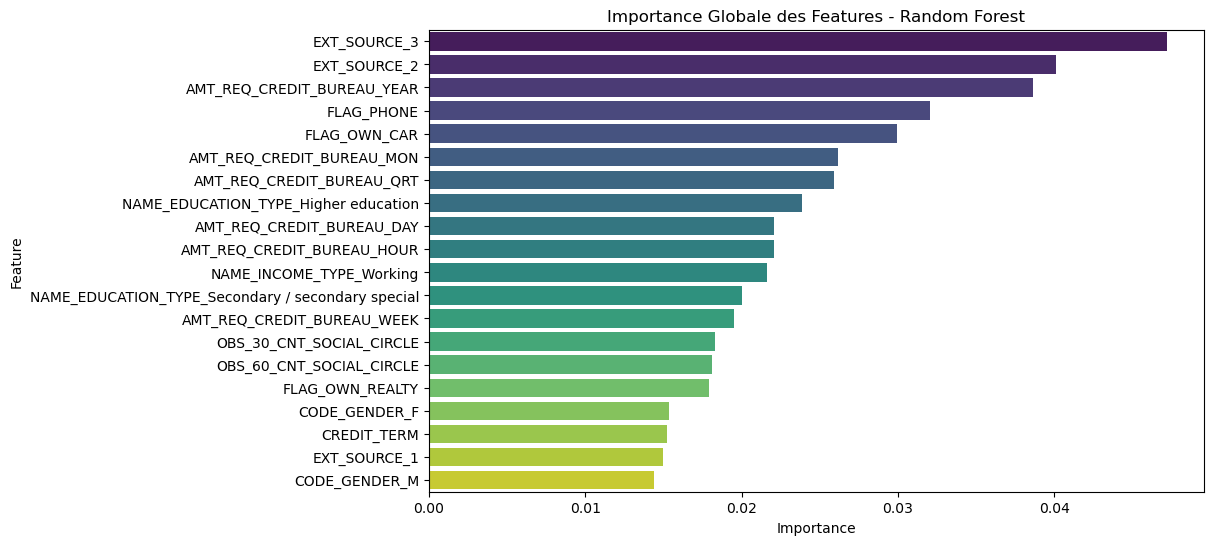

In [ ]:
best_rf = grid_search.best_estimator_

import matplotlib.pyplot as plt
import seaborn as sns

# Importance des features
feature_importance = best_rf.named_steps["model"].feature_importances_
feature_names = X_train.columns

# Convertir en DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Affichage du top 20
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df[:20], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance Globale des Features - Random Forest")
plt.show()


In [ ]:
#### Importance Locale des Features (SHAP)

In [ ]:
hhdgtfghn#

NameError: name 'hhdgtfghn' is not defined

#### Entrainer le MLFlow

In [ ]:
from pyngrok import ngrok
# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken 
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2q7bRbtaQCqgWyMIGAUBRN3QnlV_78FfxsFYARq1c89ynqP4p" 
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 8080 for http://localhost:8080

ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url) 

In [ ]:
!mlflow ui